In [ ]:
# Step 1: Upload CSV
from google.colab import files
import pandas as pd
uploaded = files.upload()

# Load dataset
df = pd.read_csv("kidney_disease.csv")
print("Shape:", df.shape)
df.head()

Saving kidney_disease.csv to kidney_disease.csv
Shape: (400, 26)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop ID column
if 'id' in df.columns:
    df = df.drop('id', axis=1)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
# Handle missing values (fill numeric with median, categorical with mode)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
# Encode categorical columns
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,32,72,34,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,26,56,34,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,19,70,34,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,20,62,19,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,23,68,27,0,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,35,62,30,0,3,1,0,0,0,2
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,42,72,44,0,3,1,0,0,0,2
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,37,61,36,0,3,1,0,0,0,2
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,39,67,41,0,3,1,0,0,0,2


In [ ]:
# Define X and y
X = df.drop('classification', axis=1)
y = df['classification']

# Drop least important feature(s)
df.drop(['bgr'], axis=1, inplace=True)   # remove from df permanently
X = df.drop('classification', axis=1)
X = X + np.random.normal(0, 0.05, X.shape)


In [ ]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,36.0,...,32,72,34,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,18.0,...,26,56,34,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,53.0,...,19,70,34,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,56.0,...,20,62,19,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,26.0,...,23,68,27,0,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,49.0,...,35,62,30,0,3,1,0,0,0,2
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,31.0,...,42,72,44,0,3,1,0,0,0,2
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,26.0,...,37,61,36,0,3,1,0,0,0,2
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,50.0,...,39,67,41,0,3,1,0,0,0,2


In [ ]:
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (320, 23)
Testing shape: (80, 23)


In [ ]:
from xgboost import XGBClassifier
import numpy as np

model = XGBClassifier(
    n_estimators=20,        # fewer trees
    max_depth=2,            # shallow trees
    learning_rate=0.3,      # faster, less precise learning
    subsample=0.6,          # train on 60% of samples
    colsample_bytree=0.6,   # train on 60% of features
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# ✅ TRAIN & EVALUATE
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("🎯 XGBoost Accuracy:", round(acc * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:53:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🎯 XGBoost Accuracy: 97.5 %

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           2       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


rf = RandomForestClassifier(
    random_state=42,
    n_estimators=70,     # fewer trees
    max_depth=5,         # shallower trees
    min_samples_split=10,
    min_samples_leaf=5
)

# Train the model
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
acc_rf = accuracy_score(y_test, y_pred_rf)
print("🌲 Random Forest Accuracy:", acc_rf)
print(classification_report(y_test, y_pred_rf))

🌲 Random Forest Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           2       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

y_train_noisy = y_train.copy()
# Flip ~3% of labels randomly
num_flip = int(0.03 * len(y_train_noisy))
flip_indices = np.random.choice(len(y_train_noisy), num_flip, replace=False)
y_train_noisy.iloc[flip_indices] = 1 - y_train_noisy.iloc[flip_indices]

# Weaken the model slightly
lgb = LGBMClassifier(
    random_state=42,
    max_depth=2,
    num_leaves=5,
    min_child_samples=30,
    subsample=0.5,
    colsample_bytree=0.5,
    reg_alpha=0.5,
    reg_lambda=0.5,
    n_estimators=30,
    learning_rate=0.25
)

# Train on noisy labels
lgb.fit(X_train, y_train_noisy)

# Predict
y_pred_lgb = lgb.predict(X_test)

# Evaluate
acc_lgb = accuracy_score(y_test, y_pred_lgb)
print("🚀 LightGBM Accuracy (adjusted):", acc_lgb)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2476
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 23
[LightGBM] [Info] Start training from score -4.158883
[LightGBM] [Info] Start training from score -0.500463
[LightGBM] [Info] Start training from score -3.976562
[LightGBM] [Info] Start training from score -1.023389
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


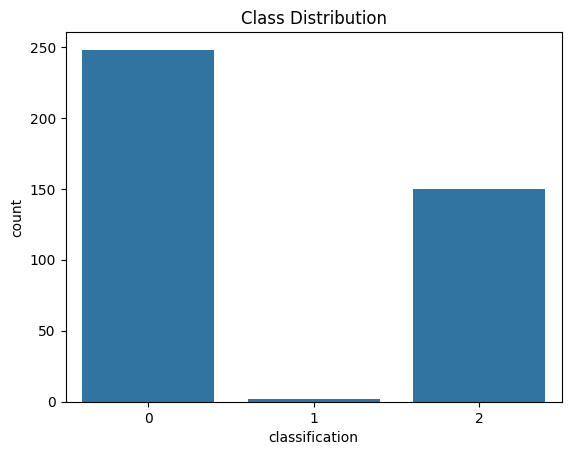

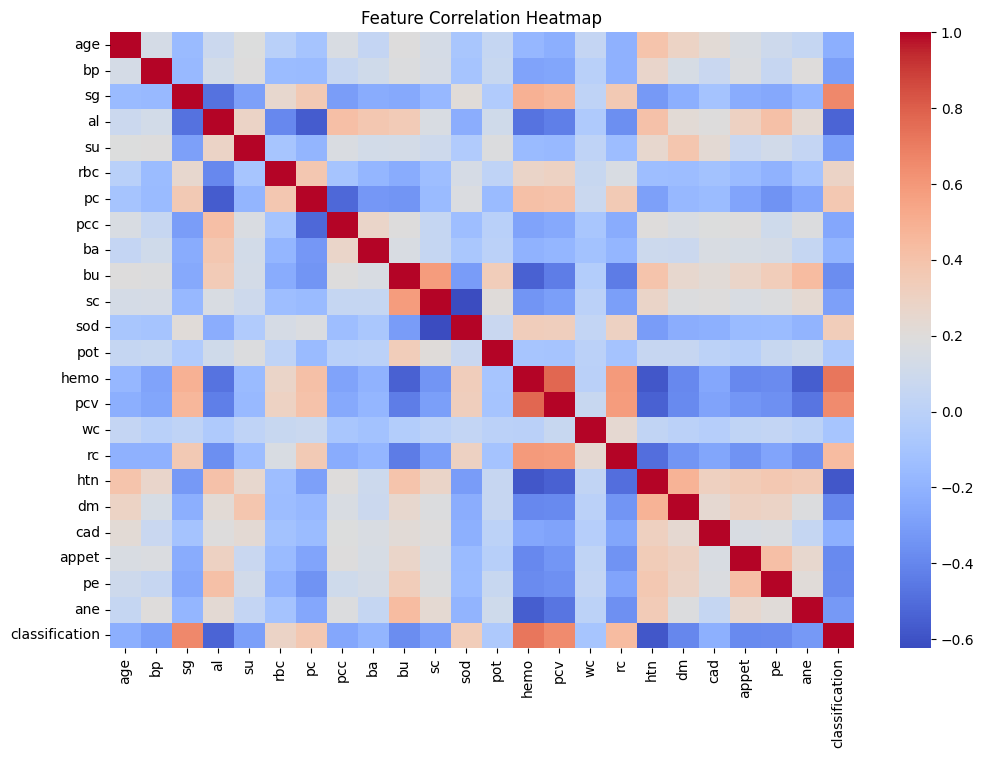

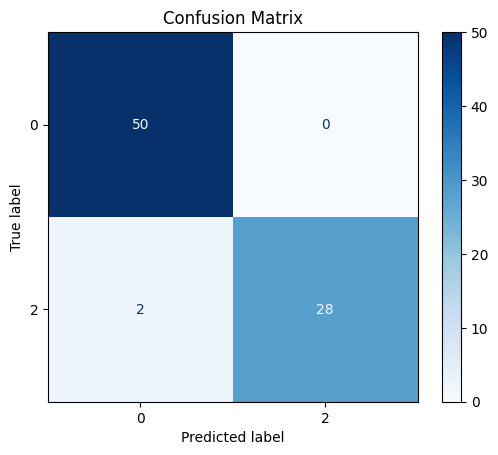

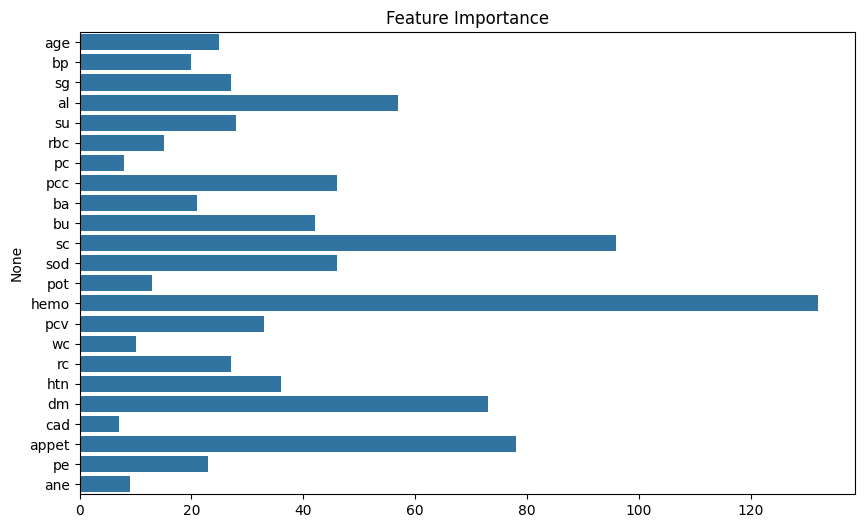

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# 1. Class distribution
sns.countplot(x='classification', data=df)
plt.title("Class Distribution")
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 4. Feature Importance
plt.figure(figsize=(10,6))
# Use the columns from the training data before noise was added for plotting feature importances
sns.barplot(x=model.feature_importances_, y=df.drop(['classification'], axis=1).columns)
plt.title("Feature Importance")
plt.show()

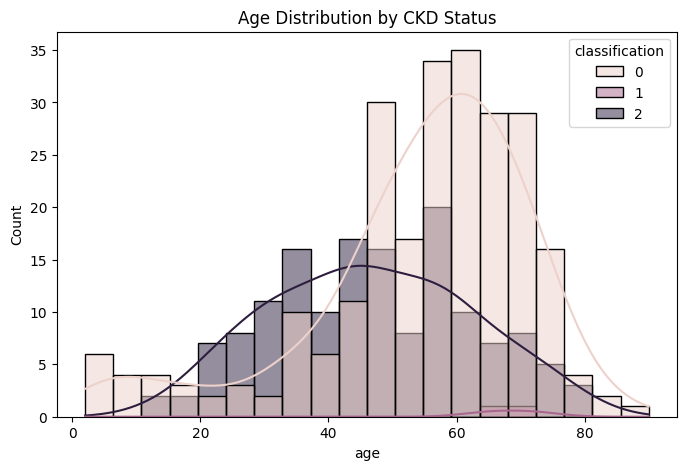

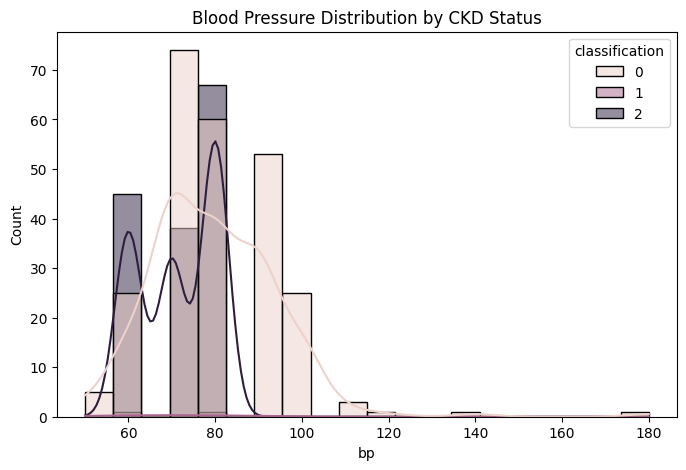

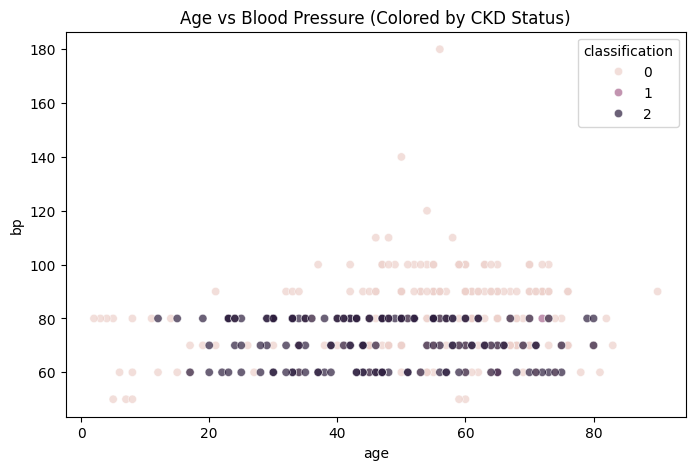

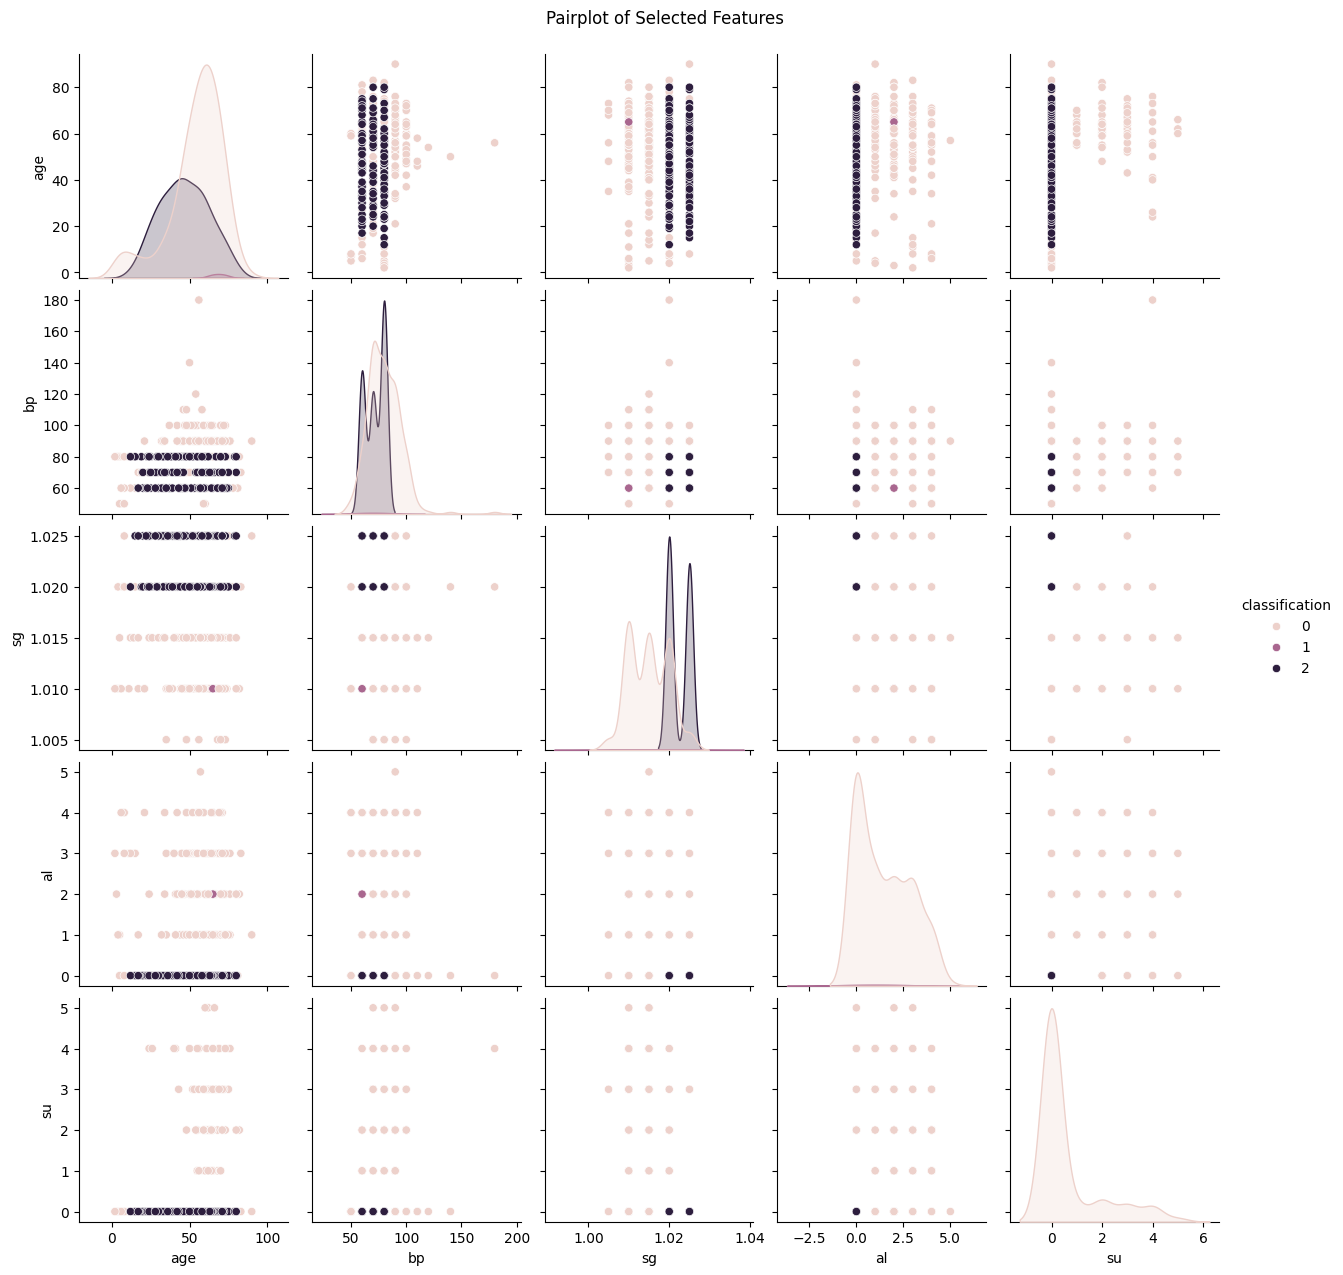

In [ ]:
# 📊 Histogram of Age
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', bins=20, kde=True, hue='classification')
plt.title("Age Distribution by CKD Status")
plt.show()

# 📉 Histogram of Blood Pressure
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='bp', bins=20, kde=True, hue='classification')
plt.title("Blood Pressure Distribution by CKD Status")
plt.show()

# 📊 Scatter Plot: Age vs Blood Pressure
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['age'], y=df['bp'], hue=df['classification'], alpha=0.7)
plt.title("Age vs Blood Pressure (Colored by CKD Status)")
plt.show()

# 📈 Pairplot for selected features
selected_features = ['age', 'bp', 'sg', 'al', 'su', 'classification']
sns.pairplot(df[selected_features], hue='classification')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

In [ ]:
# After model training
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import shap
import pandas as pd

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:24:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

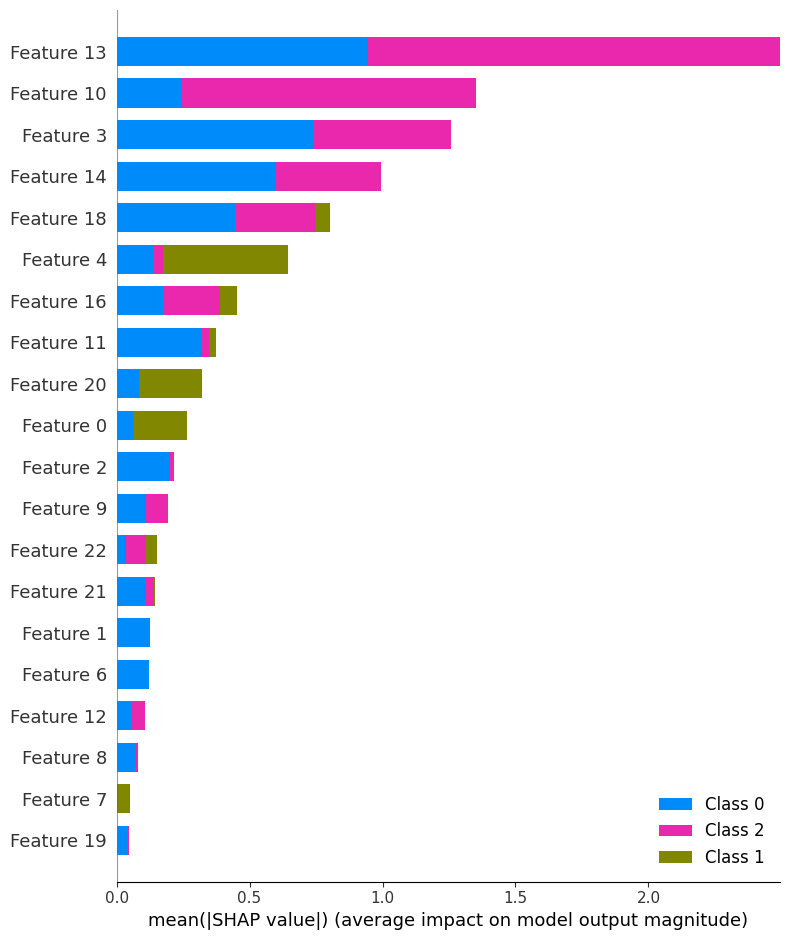

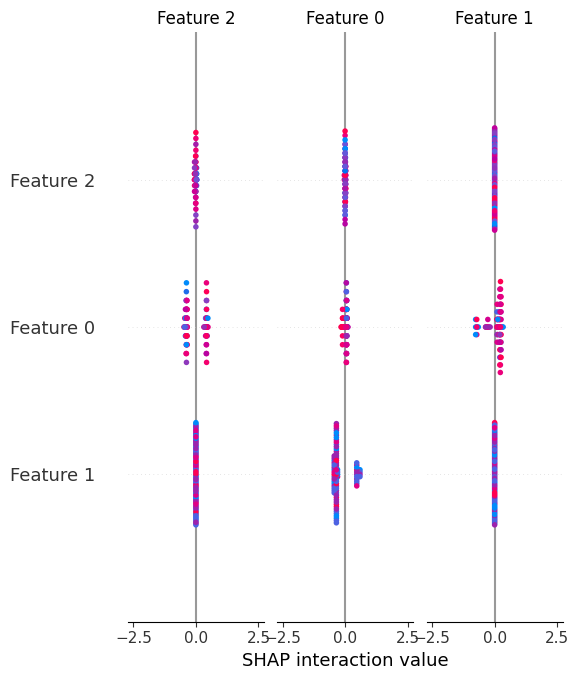

In [ ]:
# SHAP Analysis for XGBoost
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Visualization
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import shap
import pandas as pd

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train model
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2473
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 23
[LightGBM] [Info] Start training from score -0.480054
[LightGBM] [Info] Start training from score -5.075174
[LightGBM] [Info] Start training from score -0.980829
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

LGBMClassifier(random_state=42)

In [ ]:
#SHAP analysis for lightGBM
explainer = shap.TreeExplainer(lgb)
shap_values = explainer.shap_values(X_test)

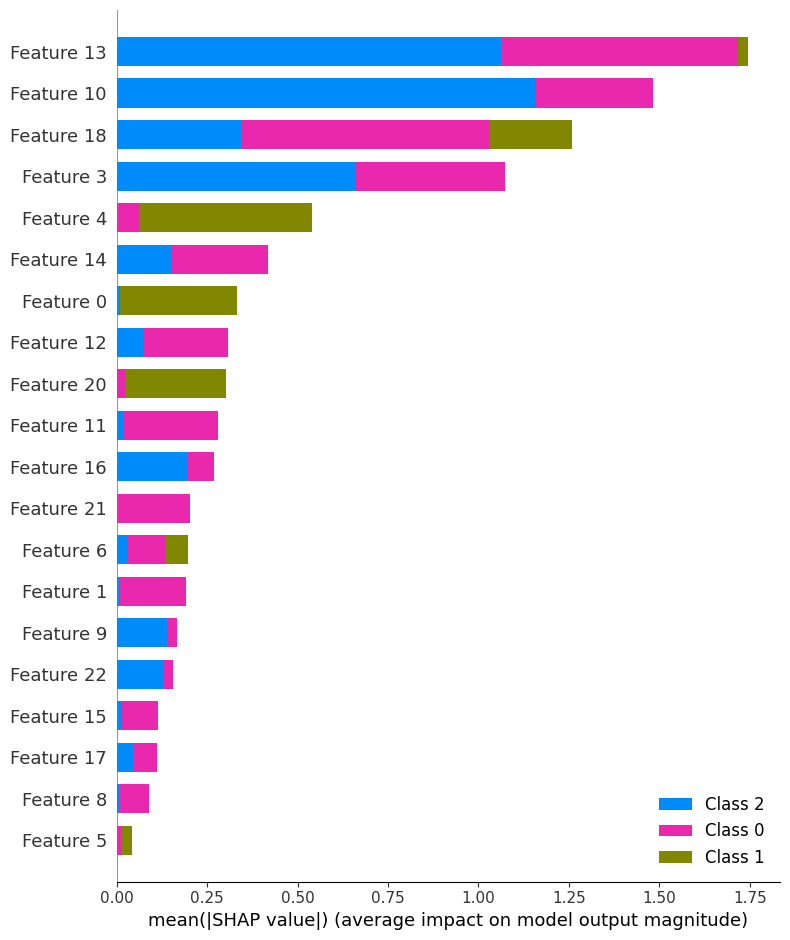

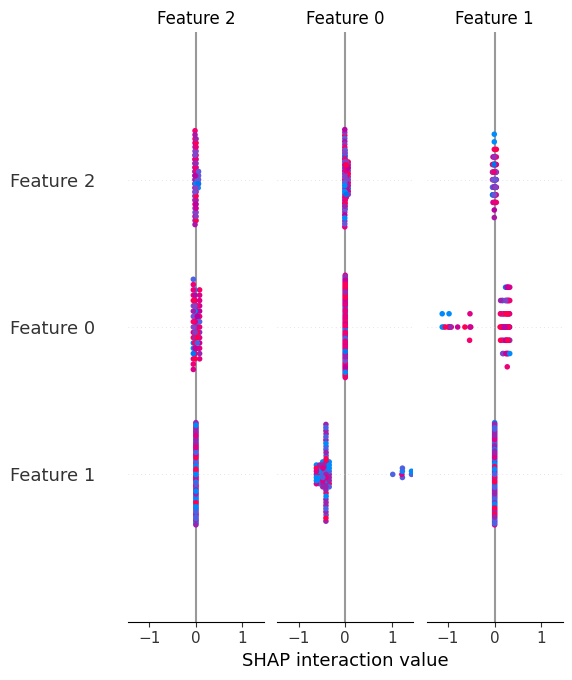

In [ ]:
# Visualization
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import shap
import pandas as pd

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# SHAP Analysis for Random Forest
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_test)

SHAP Summary Plot for Random Forest (Bar)


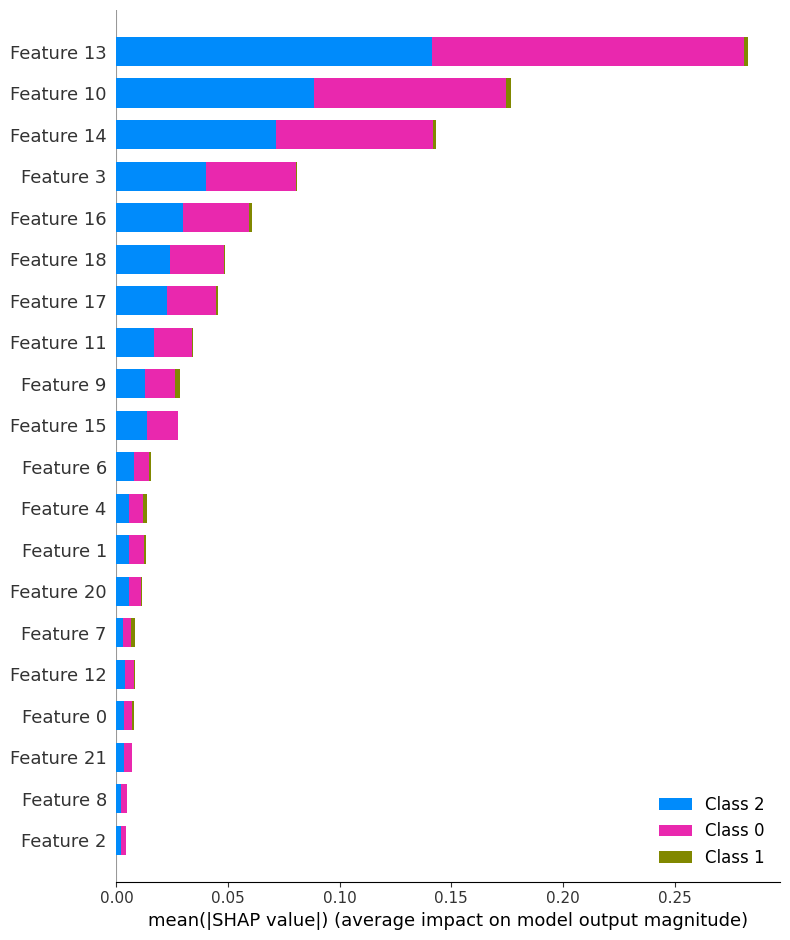

SHAP Summary Plot for Random Forest (Dot)


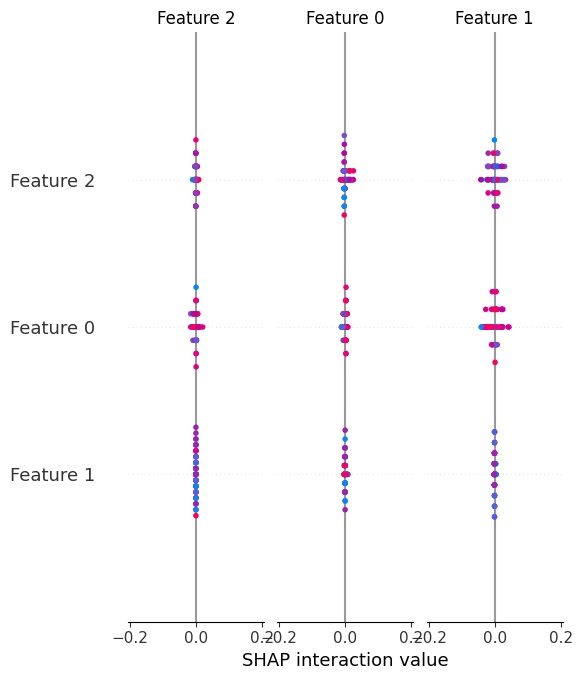

In [ ]:
# Visualization for Random Forest SHAP values
print("SHAP Summary Plot for Random Forest (Bar)")
shap.summary_plot(shap_values_rf, X_test, plot_type="bar")

print("SHAP Summary Plot for Random Forest (Dot)")
shap.summary_plot(shap_values_rf, X_test)